<a href="https://colab.research.google.com/github/rsmondejar/viu_aprendizaje_supervisado/blob/main/tema1/aprendizaje_supervisado_tema1_datos_imputacion_seleccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://github.com/ssanchezgoe/viu_aprendizaje_supervisado/blob/main/logos/logo_viu.png?raw=true" align="left" hspace="10px" vspace="0px"></p>

<h1> Asignatura de Inteligencia Artificial</h1>


La presente asignatura hace parte del máster oficial en Inteligencia Artificial, impartido en la Universidad Internacional de Valencia (VIU).

<p><a name="contents"></a></p>

# Contenido

- <a href="#procesamiento_datos_faltantes">1. Procesamiento de datos faltantes (imputación de datos)</a><br>
- <a href="#seleccion_de_atributos">2. Selección de atributos</a><br>
  - <a href="#baja_varianza">2.1. Baja varianza</a><br>
  - <a href="#f_test_informacion_mutua">2.2. F-test e información mutua</a><br>
  - <a href="#f_test_actividad">2.3. Actividad</a><br>

<p><a name="procesamiento_datos_faltantes"></a></p>

# Procesamiento de datos faltantes
[Contenidos](#contents)

El procesamiento de datos faltantes o *imputación* en ciencia de datos, corresponde al proceso en el cual un valor faltante en una colmna se reemplaza por un valor conocido, derivado del los datos existentes.

**Ejemplo 1**

In [1]:
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
# Carga de datos
X_train = [[1,      4],
           [np.nan, 3],
           [7,      8]]

In [3]:
# Limpieza de datos: imputación valores ausentes (modelo)
imputer = SimpleImputer(strategy='mean') # Utilizamos la estrategia de la media

# Aplicar los métodos "fit" y "transform" para imputar los valores pérdidos de X_train
# ???
#imputer.fit(X_train)
X_train_clean = imputer.fit_transform(X_train)
print(X_train_clean)

[[1. 4.]
 [4. 3.]
 [7. 8.]]


In [4]:
# Imputación de valores ausentes sobre el conjunto de test
X_test = [[np.nan, 10],
          [6,      np.nan],
          [8,      2]]

# Imputar los datos del conjunto de test
# ???
# print(X_test_clean)

**Ejercicio 2**

In [5]:
import pandas as pd

In [6]:
# Cargar dataframe
csv = pd.read_csv("https://raw.githubusercontent.com/ssanchezgoe/viu_aprendizaje_supervisado/main/datasets/penguins.csv", sep = ';')

csv.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


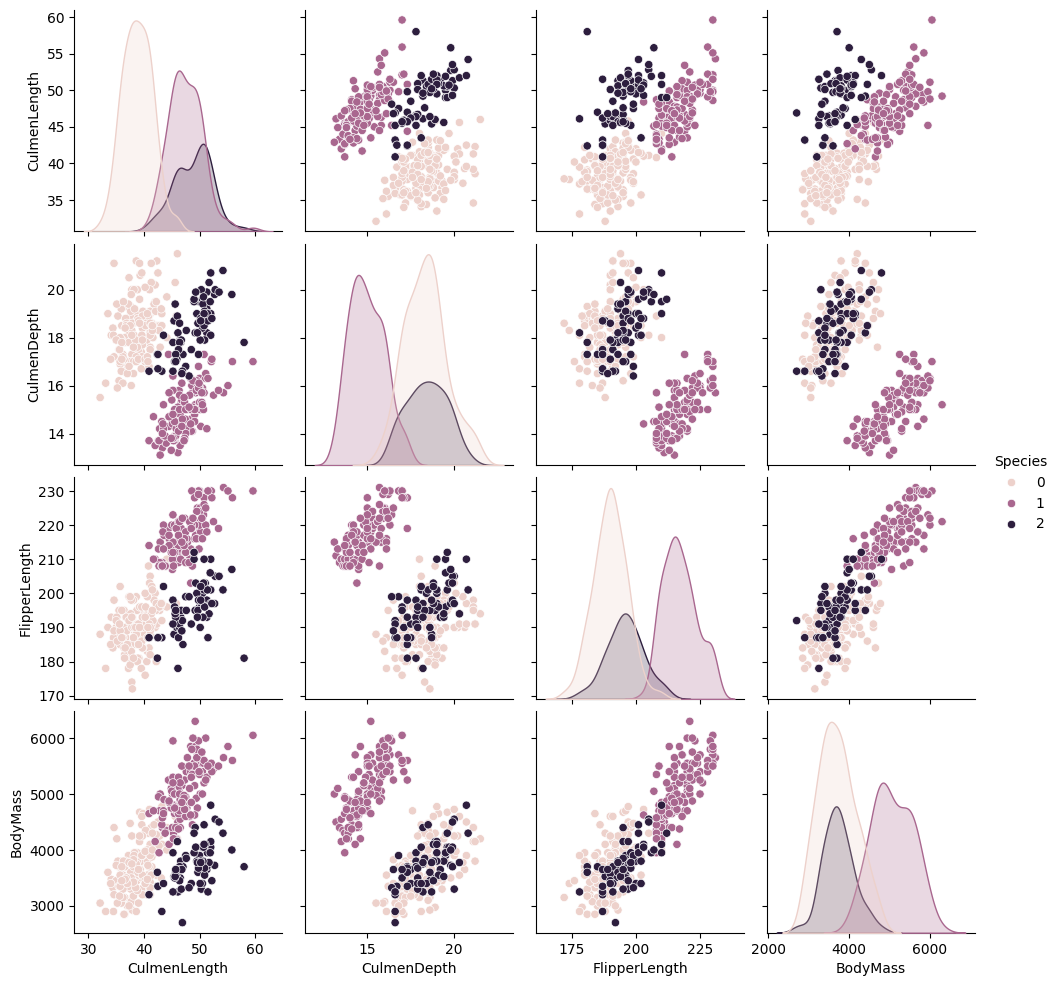

In [7]:
import seaborn as sns
sns.pairplot(data=csv, hue="Species")

In [ ]:
csv.isna().sum()

,0
CulmenLength,2
CulmenDepth,2
FlipperLength,2
BodyMass,2
Species,0


In [8]:
csv[csv.isna().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [9]:
# Conversión a numpy
data = np.array(csv)
data

array([[3.910e+01, 1.870e+01, 1.810e+02, 3.750e+03, 0.000e+00],
       [3.950e+01, 1.740e+01, 1.860e+02, 3.800e+03, 0.000e+00],
       [4.030e+01, 1.800e+01, 1.950e+02, 3.250e+03, 0.000e+00],
       ...,
       [4.960e+01, 1.820e+01, 1.930e+02, 3.775e+03, 2.000e+00],
       [5.080e+01, 1.900e+01, 2.100e+02, 4.100e+03, 2.000e+00],
       [5.020e+01, 1.870e+01, 1.980e+02, 3.775e+03, 2.000e+00]])

In [10]:
pos_ausentes = np.where(np.isnan(data))[0]
print(pos_ausentes)

[  3   3   3   3 271 271 271 271]


In [11]:
#Imputación de datos ausentes
imputer = SimpleImputer(strategy='mean')
data_clean = imputer.fit_transform(data)

In [12]:
pos_ausentes = np.where(np.isnan(data_clean))[0]
print(pos_ausentes)

[]


In [13]:
data_clean[[3,271]]

array([[4.39219298e+01, 1.71511696e+01, 2.00915205e+02, 4.20175439e+03,
        0.00000000e+00],
       [4.39219298e+01, 1.71511696e+01, 2.00915205e+02, 4.20175439e+03,
        1.00000000e+00]])

<p><a name="seleccion_de_atributos"></a></p>

# Selección de Atributos

[Contenidos](#contents)

La selección de atributos corresponde al proceso en el cual se seleccionan las características que se espera guarden una mayor relación con la variable objetivo. Este proceso puede ser llevado a cabo de dos formas:

- Análisis no supervisados: En donde se analiza el/los atributo/s independientemente de la variable objetivo.
- Análisis supervisados: En donde se analiza el/los atributo/s conjuntamente con la variable objetivo.

A su vez, estos analires pueden llevarse a cabo de dos formas:

- Análisis univariantes: en los que se analiza uno a uno los atributos con la variable objetivo.
- Análisis multivariantes: en donde se analiza conjuntamente los atributos y su relación con la variable objetivo.

<p><a name="baja_varianza"></a></p>

## Baja Varianza

[Contenidos](#contents)

La varianza es una medida de dispersión de los datos determinada por la ecuación:

$$S^2 = \frac{\sum(x_i-\bar{x})^2}{n-1}$$

en donde

- $S^2$ es la varianza de la muestra.
- $x_i$ es el valor de una observación.
- $\bar{x}$ es el valor medio de las muestras.
- $n$ es el número de muestras.

Podemos interpretar la varianza como la desviación promedio de los datos respecto al valor medio.

El supuesto que realizamos al decidir eliminar una columna por baja varianza es que dicha característica no guarda ningún tipo de dependencia de la variable objetivo.

**Ejemplo**

In [14]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn import datasets
import pandas as pd

In [15]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [16]:
df_iris.var()

,0
sepal length (cm),0.685694
sepal width (cm),0.189979
petal length (cm),3.116278
petal width (cm),0.581006
target,0.671141


In [17]:
X = df_iris.to_numpy()[:,:-1]
X[0:7]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3]])

In [18]:
thresholder = VarianceThreshold(threshold=.6)

X_high_variance = thresholder.fit_transform(X)

X_high_variance[0:7]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4]])

<p><a name="f_test_informacion_mutua"></a></p>

## F-Test e información mutua

[Contenidos](#contents)

<p><a name="f_test_actividad"></a></p>

## Actividad

[Contenidos](#contents)

Revisar los contenidos ilustrados en las páginas 31-32 del [manual de la asignatura](https://learn.universidadviu.com/bbcswebdav/pid-6194188-dt-content-rid-64997463_1/xid-64997463_1).

Estos metodos tienen dos objetivos diferentes para probar el tipo de dependencia de las diferentes caracteríscias con la variable objetivo, a saber:

- **F-Test**: mide la dependencia lineal de una variable con la variable objetivo.

- Prueba de **información mutua**: test que mide la dependencia lineal o no de una variable respecto a la variable objetivo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

In [ ]:
# Carga de datos.
np.random.seed(42)
X = np.random.rand(1000, 3)
print(X)
print(np.shape(X))

In [ ]:
# Definimos la etiqueta (target, ground truth) haciéndola dependiente de las características x1 y x2
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

In [ ]:
# Evaluación de atributos: F-Test.
f_test, _ = f_regression(X, y) # Llamamos al estadístico F
f_test /= np.max(f_test) # Normalizamos

In [ ]:
# Evaluación de atributos: información mutua.
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

In [ ]:
# Graficamos la distribución de los datos y evaluación de atributos.
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i],
              mi[i]), fontsize=16)
plt.show()